going through the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving ai4i2020.csv to ai4i2020.csv


In [ ]:
import pandas as pd
import io

# Load the uploaded file
data = pd.read_csv(io.BytesIO(uploaded['ai4i2020.csv']))
print(data.head())


   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

In [ ]:
# Basic information about the dataset
print("Dataset Info:")
print(data.info())

# Summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Check the first few rows
print("\nPreview of the Dataset:")
print(data.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float6

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


In [ ]:
# Define the target column
target_column = "Machine failure"  # Replace this with the actual name of the failure column

# Separate features (X) and target (y)
X = data.drop(columns=[target_column, 'UDI', 'Product ID'], errors='ignore')  # Drop IDs
y = data[target_column]

# Check the shapes
print("\nFeatures shape:", X.shape)
print("Target shape:", y.shape)



Features shape: (10000, 11)
Target shape: (10000,)


In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (8000, 11)
Testing set size: (2000, 11)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
# Convert categorical features to numerical using one-hot encoding
# NOTE: Apply get_dummies on the original data (or a copy) that still contains the 'Product ID' column
X_encoded = pd.get_dummies(data, columns=['Type', 'Product ID'], drop_first=True) # Use original data 'data' here
X_encoded = X_encoded.drop(columns=[target_column, 'UDI'], errors='ignore') # Drop unnecessary columns after encoding

# Split data into training and testing sets after encoding
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Now proceed with model training
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.999

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000



plotting everything

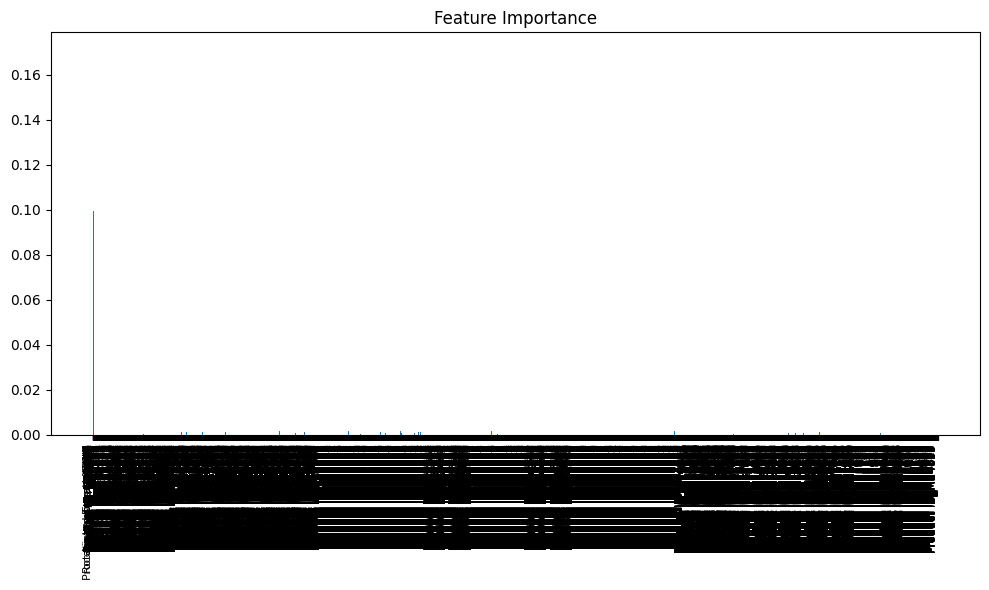

In [ ]:
import matplotlib.pyplot as plt

# Get feature importance
feature_importance = rf_model.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(X_encoded.columns, feature_importance)
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()


save the file

In [ ]:
import joblib

# Save the trained model
joblib.dump(rf_model, 'failure_prediction_model.pkl')
print("Model saved successfully!")


Model saved successfully!
